# Airline delay dataset exploration findings
## Ramanathan


## Investigation Overview


>It can be noted that least average flight delay happened on the year of 2020 and generally during the months of june and july the average flight delay time is maximum

>Comair Inc is the most affected by weather. Aloha Inc and Hawaiian Inc. are most affected by carrier-related issues

>November month has the least amount of cancellations while january has the most flights cancelled

>Different carriers have varying total arrived flights, indicating differences in market share and scale.
South west airlines has the most arrived flights. 


## Dataset Overview

> This dataset is mainly focused on the various types of delays and the duration of these delay. it is an extensive database of over 20 years. Data is categorised based on the carrier,airport and carrier code.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Airline_Delay_Cause.csv')
df.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Average Flight Delay Over Time

>It can be noted that least average flight delay happened on the year of 2020 and generally during the months of june and july the average flight delay time is maximum (more than 6000 minutes)



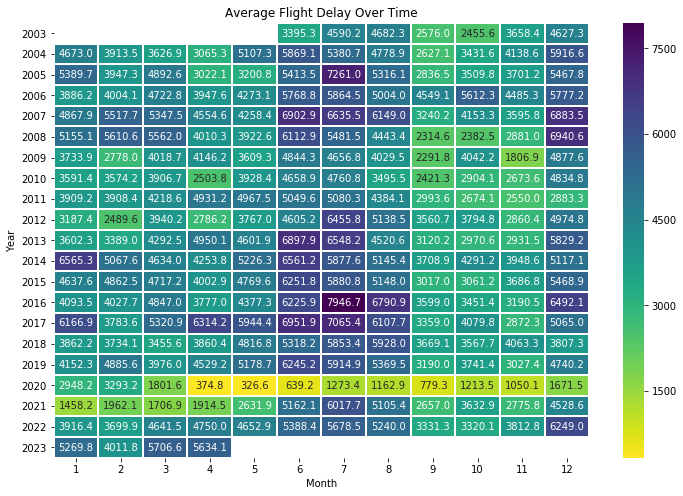

In [17]:
#heatmap to visualize how flight delays change over time.
#Pivot the DataFrame to get average arrival delays by year and month
pivot_df = df.pivot_table(values='arr_delay', index='year', columns='month', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))

sb.heatmap(pivot_df, cmap='viridis_r',annot=True, fmt=".1f", linewidths=1)
plt.title('Average Flight Delay Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Percentage of Delay Components by Carrier

>Comair Inc is the most affected by weather. Aloha Inc and Hawaiian Inc. are most affected by carrier-related issues

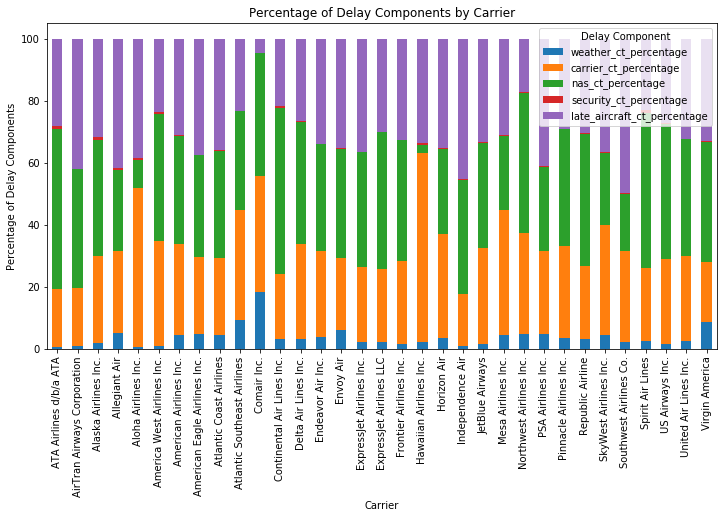

In [18]:
# Group the data by carrier and calculate the sum of various delay components
grouped = df.groupby('carrier_name')[['weather_ct', 'carrier_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct','arr_del15']].sum()


# Calculate the percentages for each delay component
delay_components = ['weather_ct', 'carrier_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
for component in delay_components:
    grouped[component + '_percentage'] = (grouped[component] / grouped['arr_del15']) * 100

# Select only the percentage columns for plotting
percentage_columns = [component + '_percentage' for component in delay_components]

# Create a 100% stacked bar chart
ax = grouped[percentage_columns].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Carrier')
plt.ylabel('Percentage of Delay Components')
plt.title('Percentage of Delay Components by Carrier')
plt.xticks(rotation=90)
plt.legend(title='Delay Component', loc='upper right')
plt.show()

## Total cancelled Flights by month

>November month has the least amount of cancellations while january has the most flights cancelled

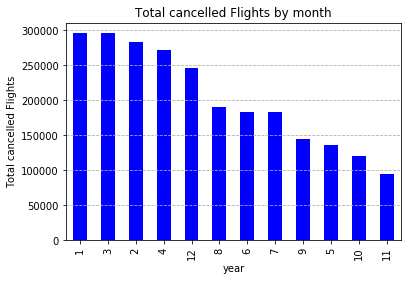

In [19]:
#Which month has the highest number of cancelled flights?
flight_cancelled=df.groupby('month')['arr_cancelled'].sum()
flight_cancelled_sorted=flight_cancelled.sort_values(ascending=False)
flight_cancelled_sorted.plot(kind='bar',color='blue')
plt.xlabel('year')
plt.ylabel('Total cancelled Flights')
plt.title('Total cancelled Flights by month')
plt.xticks(rotation=90);
plt.grid(axis='y', linestyle='--', alpha=1)

## Market share of different airlines
> Different carriers have varying total arrived flights, indicating differences in market share and scale.
South west airlines has the most arrived flights. 

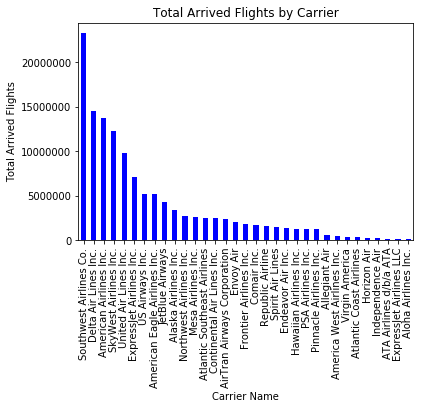

In [20]:
#Which airline has the highest number of flights arrived?
flight_arrived=df.groupby('carrier_name')['arr_flights'].sum()
#Sort the carriers in descending order based on the total arrived flights
flight_arrived_sorted=flight_arrived.sort_values(ascending=False)
flight_arrived_sorted.plot(kind='bar',color='blue')
plt.xlabel('Carrier Name')
plt.ylabel('Total Arrived Flights')
plt.title('Total Arrived Flights by Carrier')
plt.xticks(rotation=90);
plt.ticklabel_format(style='plain', axis='y')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 572819 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
